In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv("E:\\internships\\UniAcco internship\\bank.csv", sep=';')

In [6]:
test_df.head()

NameError: name 'test_df' is not defined

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.shape

(4521, 17)

In [11]:
df.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5452\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


Data Visualization

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5452\4094626394.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")


<AxesSubplot: >

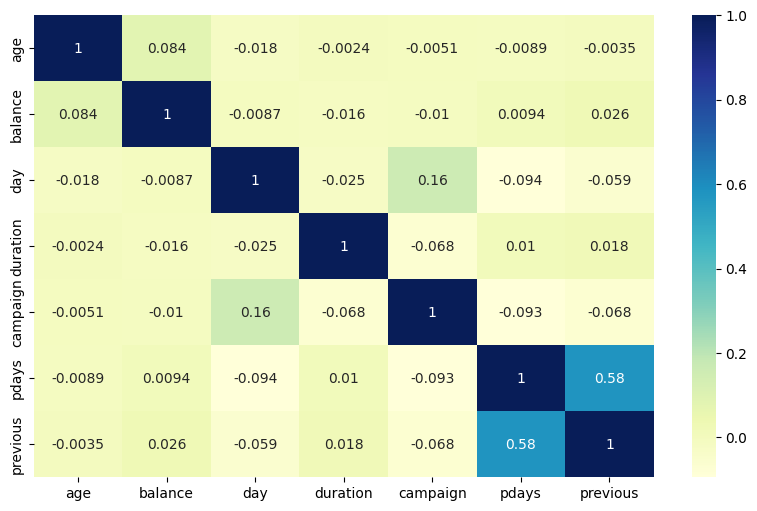

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

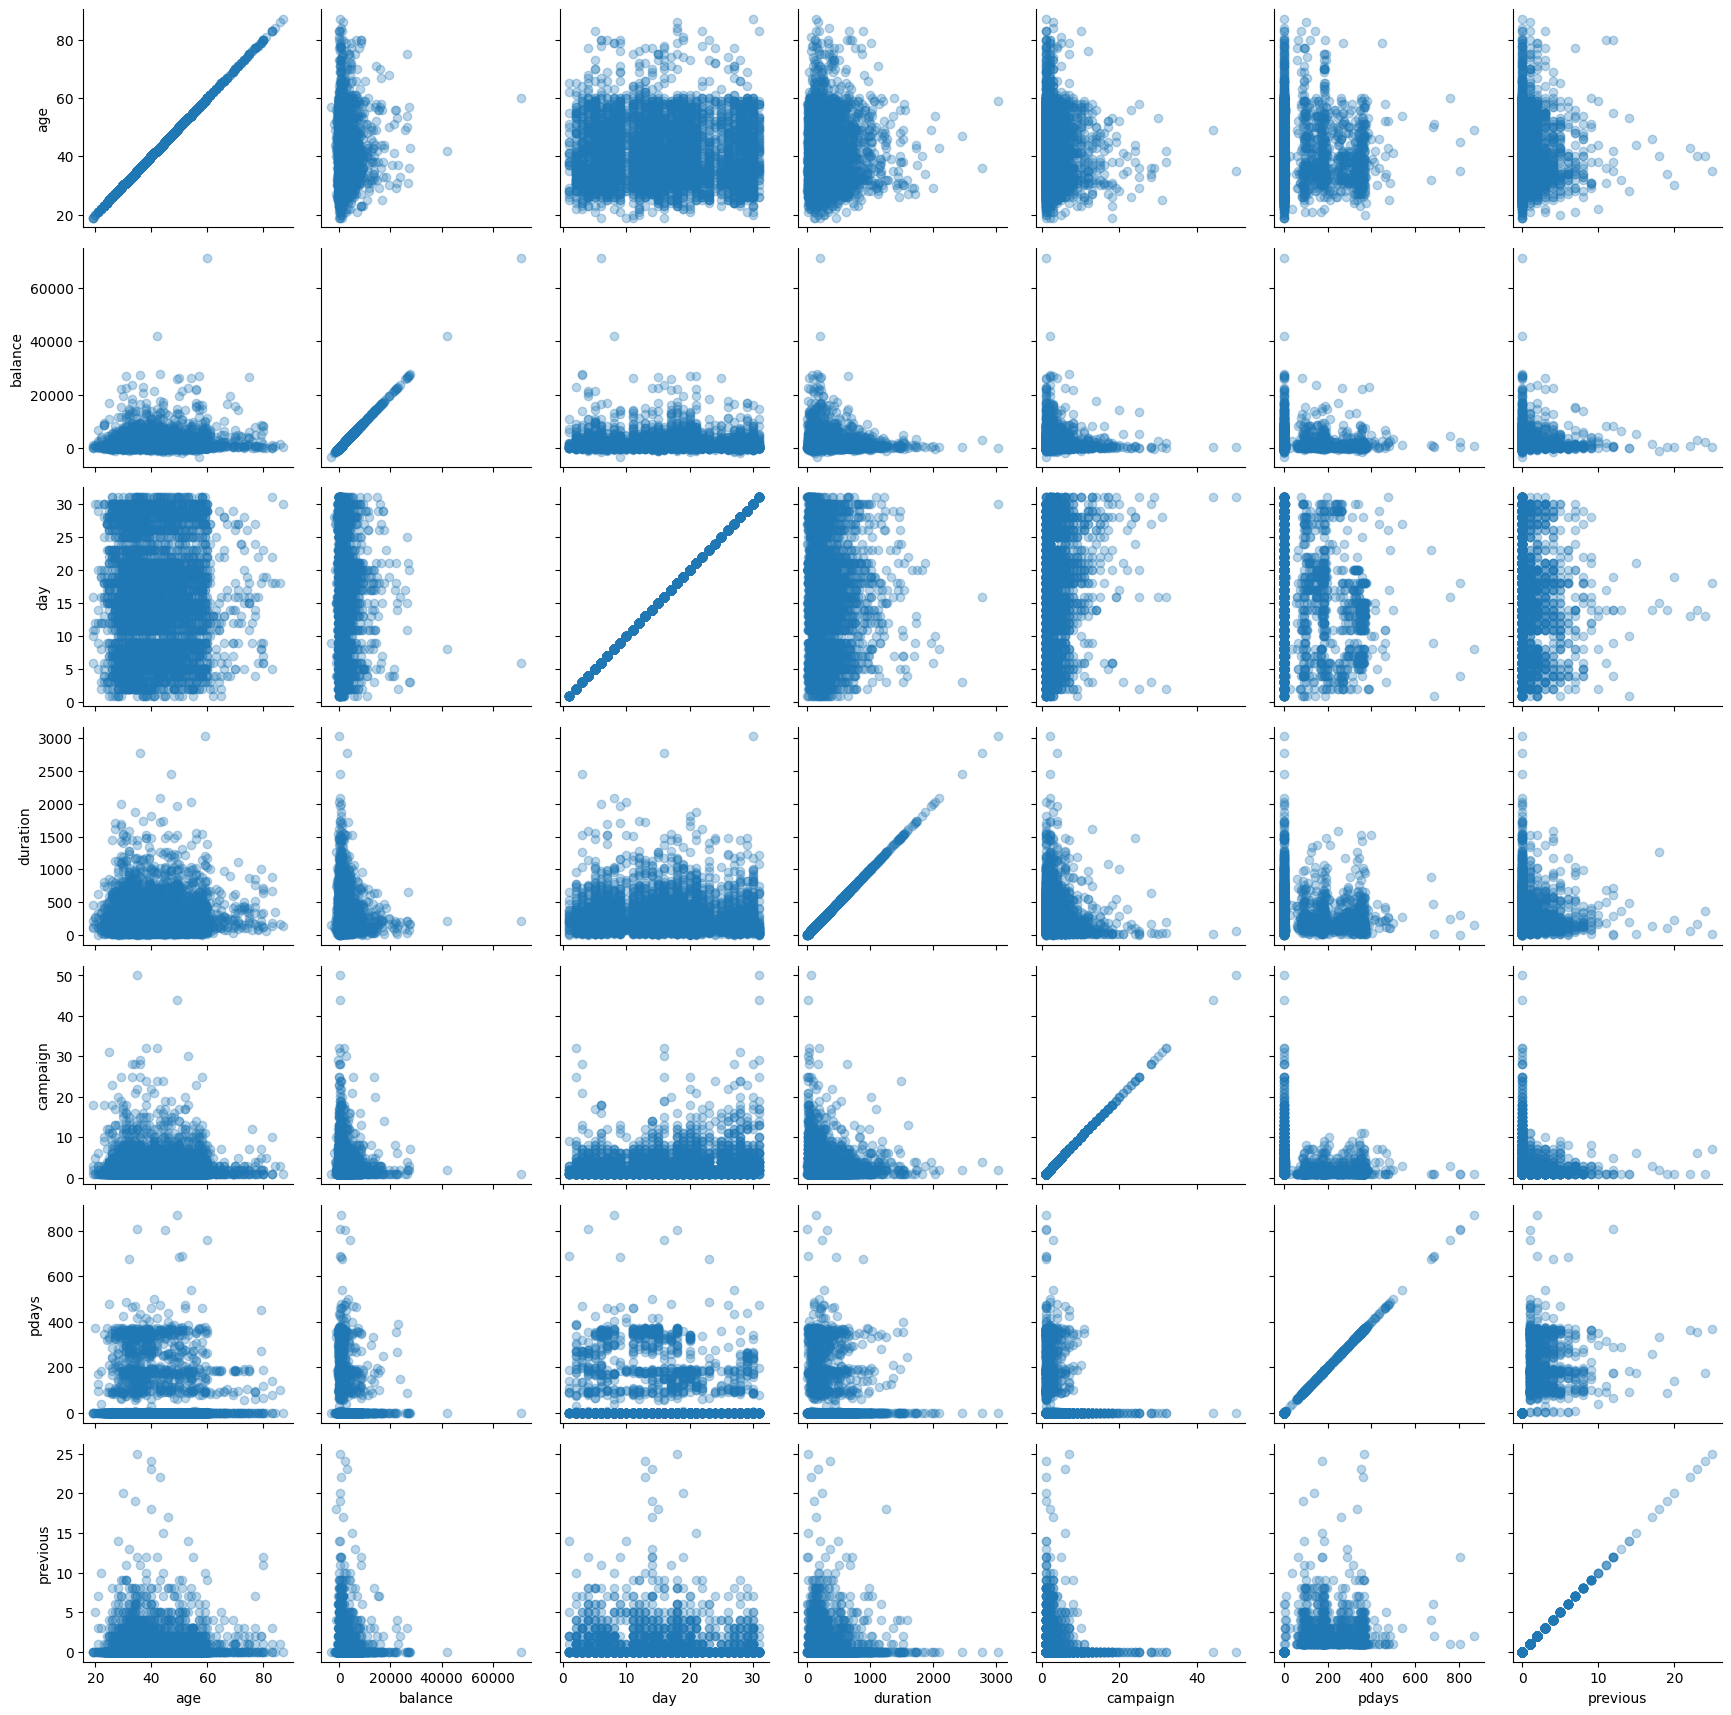

In [13]:
g = sns.PairGrid(data = df)
g.map(plt.scatter, alpha = 0.3);

<AxesSubplot: xlabel='campaign', ylabel='count'>

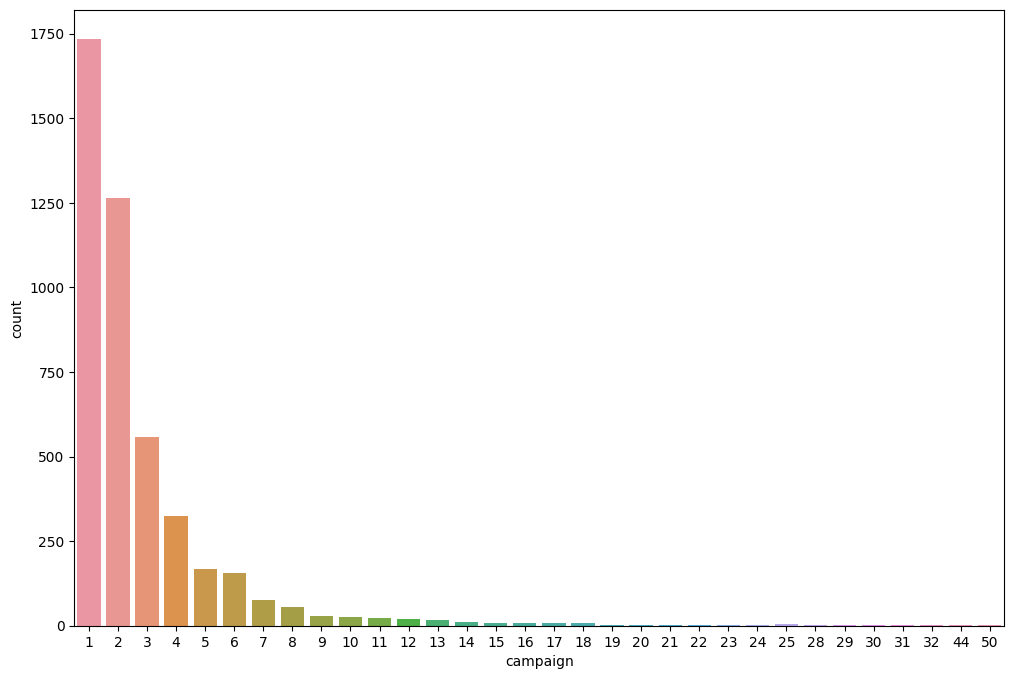

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x='campaign', data=df)

<AxesSubplot: xlabel='y', ylabel='count'>

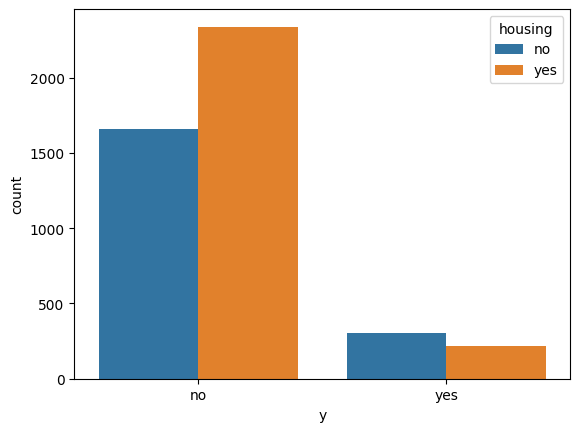

In [15]:
sns.countplot(x='y', hue='housing', data=df)

<AxesSubplot: xlabel='y', ylabel='count'>

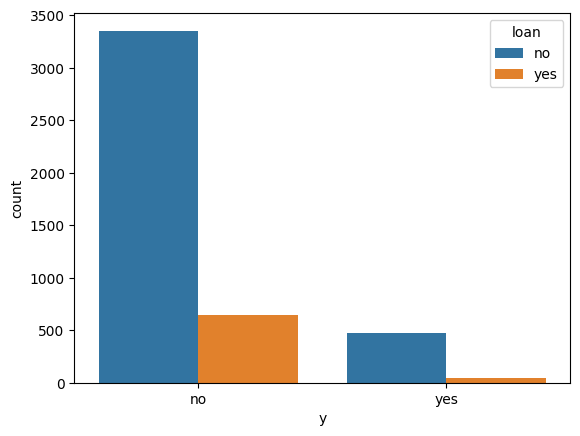

In [16]:
sns.countplot(x='y', hue='loan', data=df)

<AxesSubplot: xlabel='y', ylabel='campaign'>

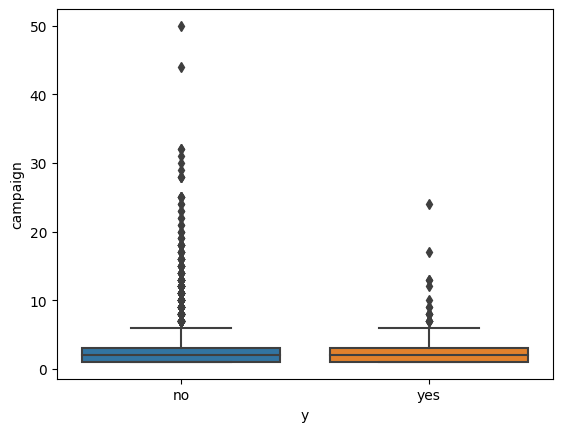

In [17]:
sns.boxplot(x='y', y='campaign', data=df)

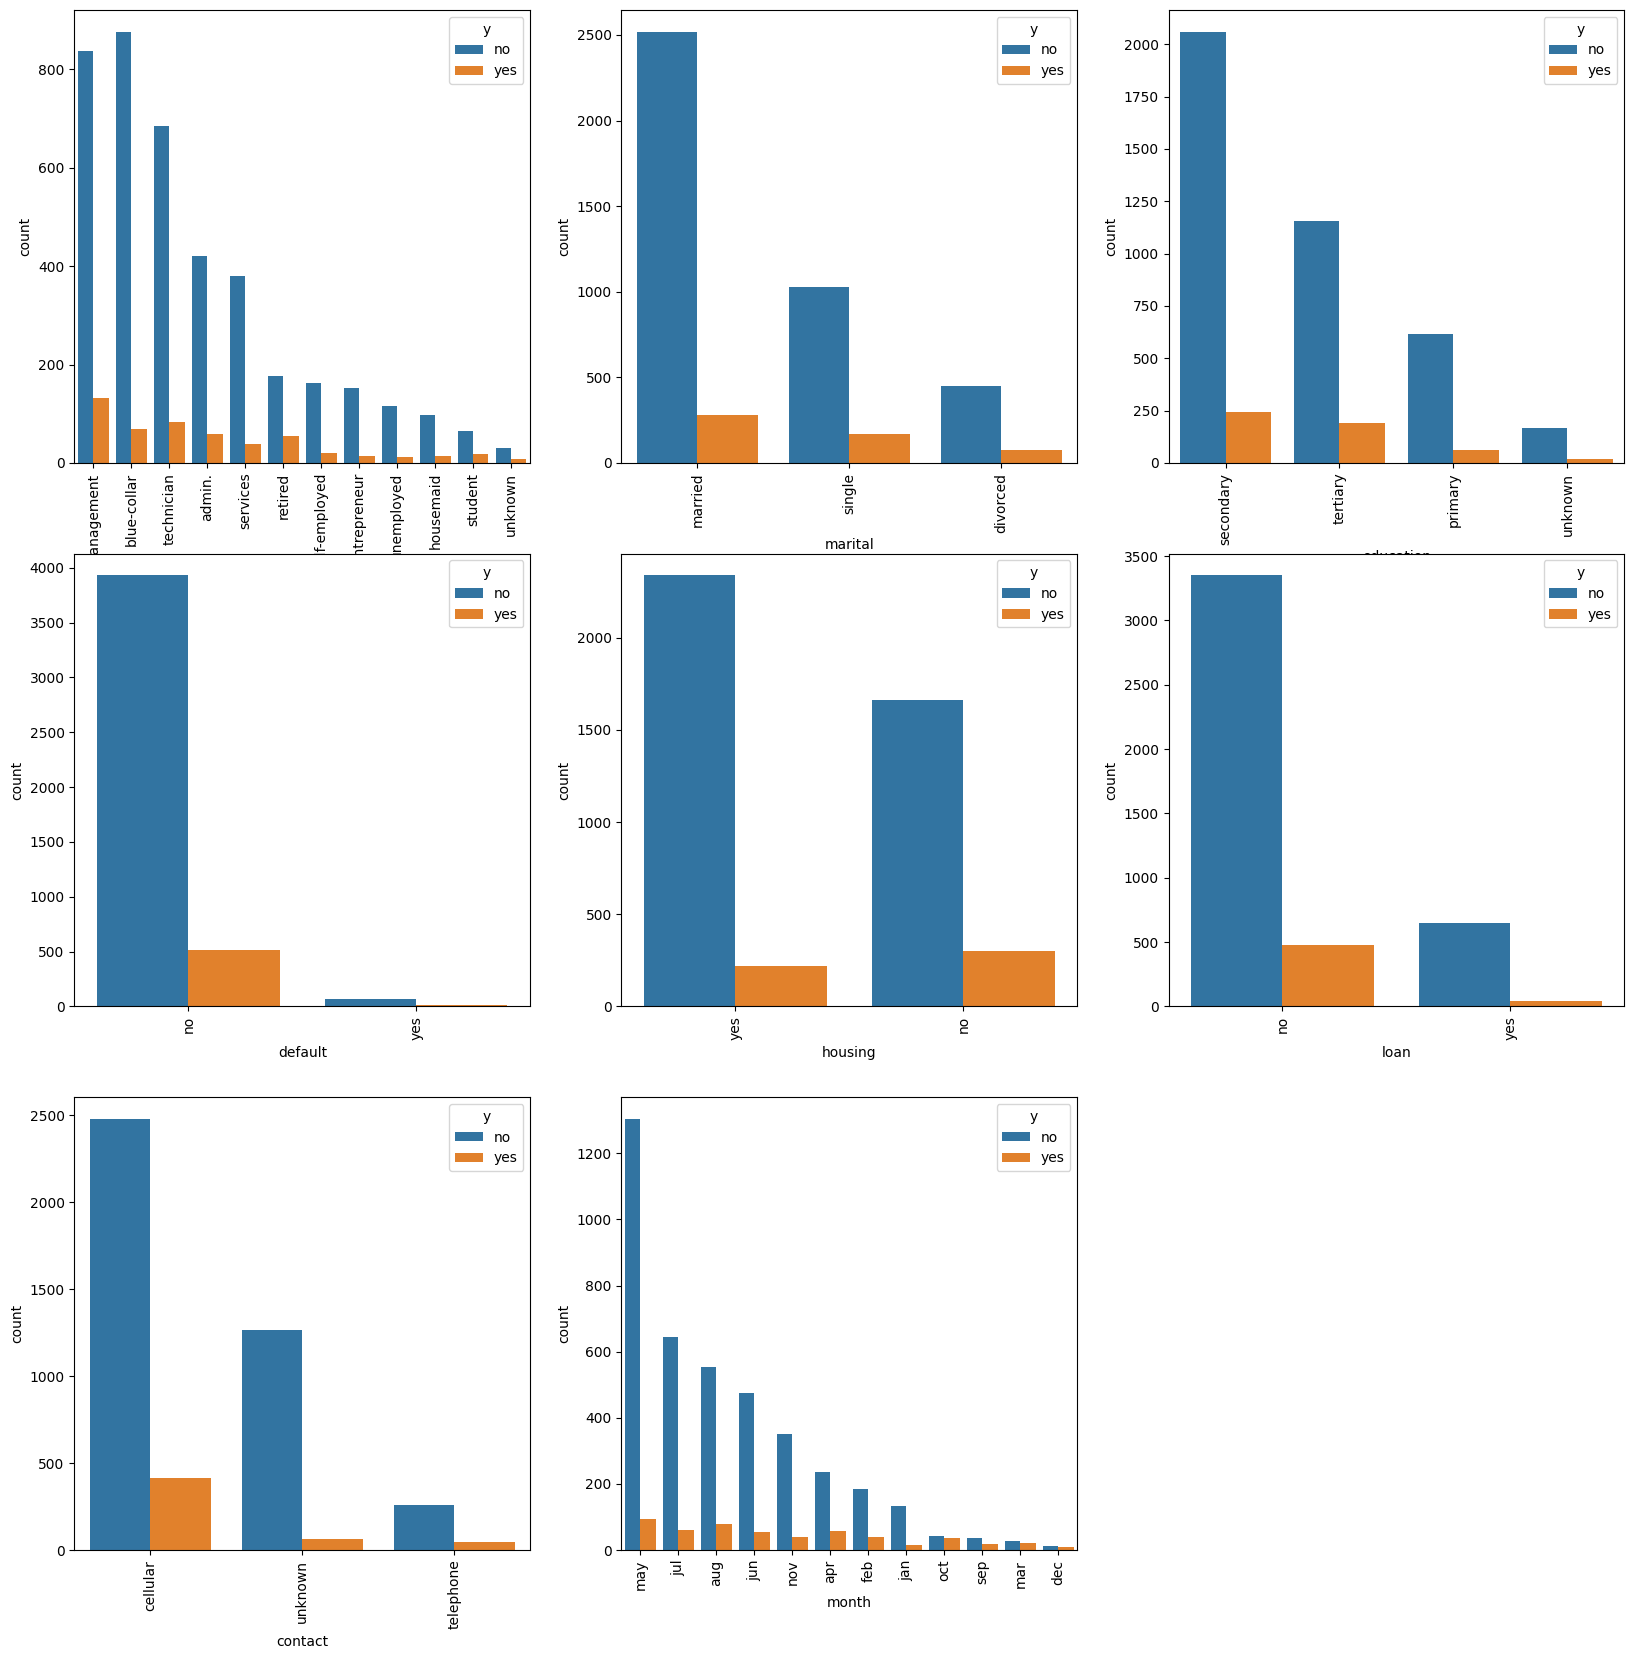

In [18]:
#Exploring Catigorical variables effect on deposits

cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

i = 1
plt.figure(figsize = (20,20))
for col in cols:
    plt.subplot(3,3,i)
    freq = df[col].value_counts()
    order = freq.index
    sns.countplot(data = df, x = col, hue = 'y', order = order)
    plt.xticks(rotation = 90);
    i = i+1
    
    
# By looking at the charts above we can see some interesting findings:
# Jobs like blue-collar and services are less likely to make a deposit
# Married people are less likely to make deposits.
# People who have housing loans are shown to be a less favorable target persona.
# People using cellular showed more positive responses.

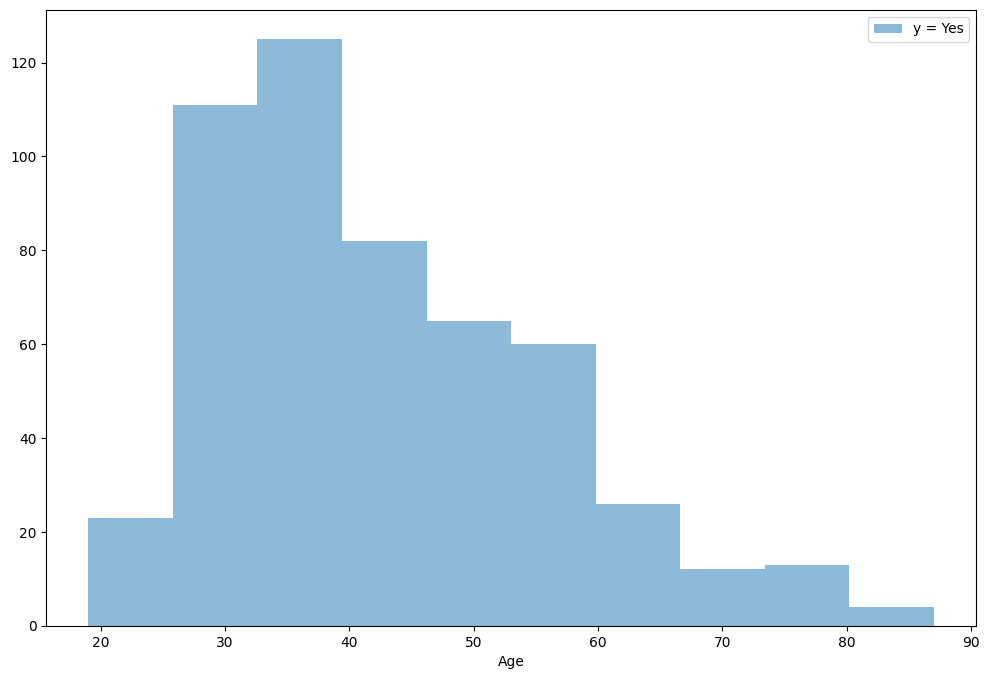

In [19]:
plt.figure(figsize = (12,8))
plt.hist(data = df[df['y'] == 'yes'], x = 'age', alpha = 0.5, label = 'y = Yes')
plt.xlabel('Age')
plt.legend();

# we can see people between the age of 25 to 40 are more likely to subscribe to term deposits.

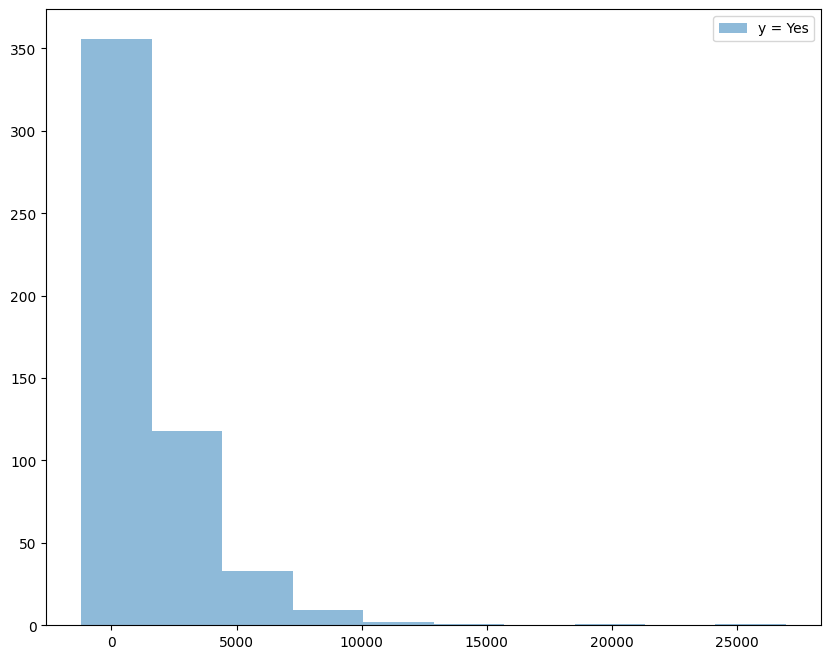

In [20]:
plt.figure(figsize = (10,8))
plt.hist(data = df[df['y'] == 'yes'], x = 'balance', alpha = 0.5, label = 'y = Yes')
plt.legend();
#We can see that people with more balance in their accounts are a more favorable target.

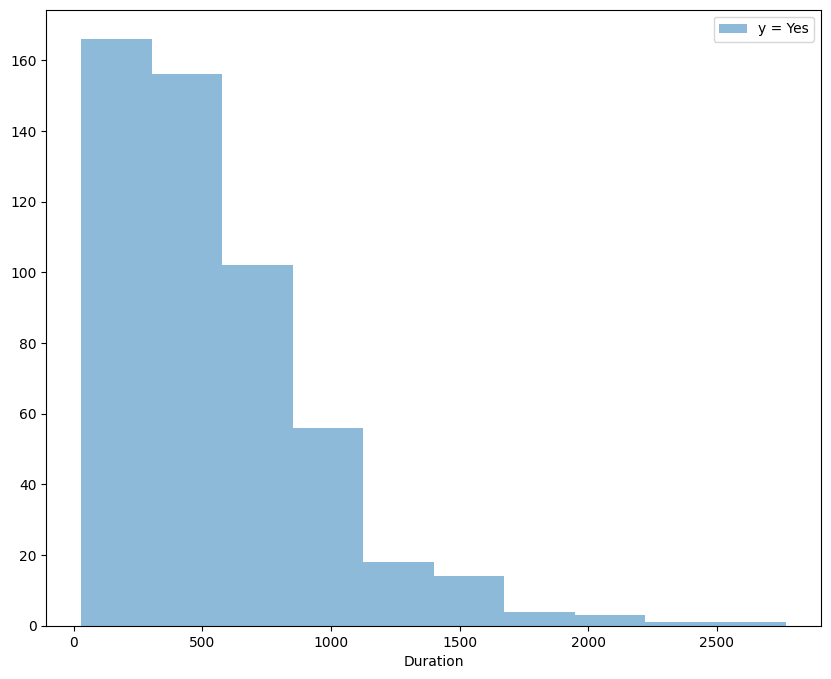

In [21]:
plt.figure(figsize = (10,8))
plt.hist(data = df[df['y'] == 'yes'], x = 'duration', alpha = 0.5, label = 'y = Yes')
plt.xlabel('Duration')
plt.legend();
# The graph shows that the longer duration a client takes the more likely he is to subscribe

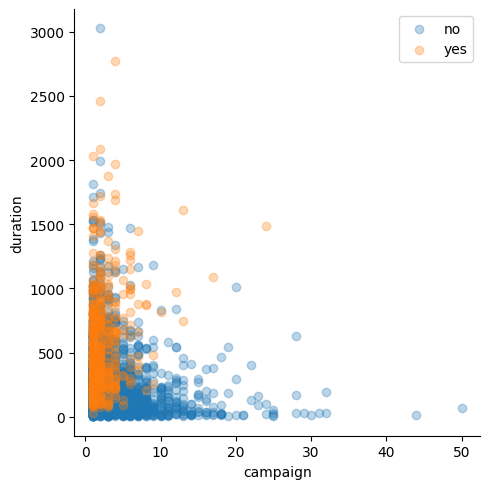

In [22]:
g = sns.FacetGrid(data = df, hue = 'y', height = 5)
g.map(plt.scatter,'campaign','duration', alpha = 0.3)
plt.legend();
# We can conclude from this graph that when a client is contacted fewer number of times and longer durations; he is very likely to accept the offer and subscribe to term deposit.

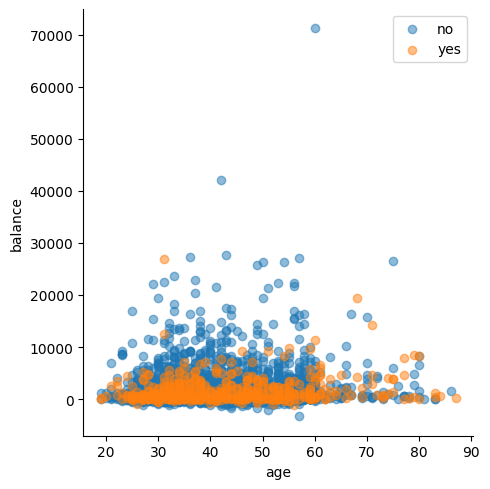

In [23]:
g = sns.FacetGrid(data = df, hue = 'y', height = 5)
g.map(plt.scatter,'age','balance', alpha = 0.5)
plt.legend();

Data Preprocessing

In [24]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [25]:
df['y'] = df['y'].map({'yes' : 1, 'no' : 0})
df['default'] = df['default'].map({'yes' : 1, 'no' : 0})
df['housing'] = df['housing'].map({'yes' : 1, 'no' : 0})
df['loan'] = df['loan'].map({'yes' : 1, 'no' : 0})

In [26]:
df = df.drop(["duration"], axis=1)

In [27]:
df.default.value_counts()

0    4445
1      76
Name: default, dtype: int64

In [28]:
encoder = LabelEncoder()

In [29]:
df['job'] = encoder.fit_transform(df['job'])

In [30]:
df['marital'] = encoder.fit_transform(df['marital'])
df['education'] = encoder.fit_transform(df['education'])
df['contact'] = encoder.fit_transform(df['contact'])
df['month'] = encoder.fit_transform(df['month'])
df['poutcome'] = encoder.fit_transform(df['poutcome'])

In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,1,-1,0,3,0


In [32]:
X=df.drop('y', axis=1).values
Y = df['y'].values

In [33]:
# dividing the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=5)

In [34]:
scaler = MinMaxScaler()

In [35]:
# scaling the Data
X_train = scaler.fit_transform(X_train)

In [36]:
X_test = scaler.transform(X_test)

In [37]:
# building the model
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [38]:
# getting an early_stop to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)

In [39]:
randomState = 0
svm = SVC(random_state = randomState)
svm.fit(X_train, Y_train)
y_pred = svm.predict(X_test)
confmat = confusion_matrix(Y_test, y_pred)

In [40]:
lr = LogisticRegression(random_state = randomState, C = 3)
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
confmat = confusion_matrix(Y_test, y_pred)

In [41]:
# fitting the model
model.fit(x=X_train, y=Y_train, epochs=200,batch_size=256 , validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/200
15/15 [==============================] - 3s 37ms/step - loss: 0.6180 - val_loss: 0.4829
Epoch 2/200
15/15 [==============================] - 0s 10ms/step - loss: 0.4339 - val_loss: 0.3544
Epoch 3/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3771 - val_loss: 0.3520
Epoch 4/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3789 - val_loss: 0.3448
Epoch 5/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3678 - val_loss: 0.3426
Epoch 6/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3617 - val_loss: 0.3418
Epoch 7/200
15/15 [==============================] - 0s 10ms/step - loss: 0.3550 - val_loss: 0.3415
Epoch 8/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3608 - val_loss: 0.3408
Epoch 9/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3592 - val_loss: 0.3407
Epoch 10/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3527 - val_loss: 0.3406

15/15 [==============================] - 0s 11ms/step - loss: 0.3173 - val_loss: 0.3244
Epoch 83/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3155 - val_loss: 0.3246
Epoch 84/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3163 - val_loss: 0.3222
Epoch 85/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3167 - val_loss: 0.3243
Epoch 86/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3128 - val_loss: 0.3246
Epoch 87/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3134 - val_loss: 0.3246
Epoch 88/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3085 - val_loss: 0.3241
Epoch 89/200
15/15 [==============================] - 0s 10ms/step - loss: 0.3139 - val_loss: 0.3241
Epoch 90/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3122 - val_loss: 0.3248
Epoch 91/200
15/15 [==============================] - 0s 10ms/step - loss: 0.3151 - val_loss: 0.3267
Epo

<AxesSubplot: >

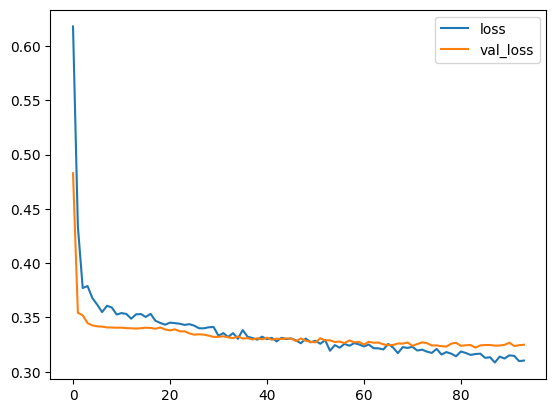

In [42]:
# getting loss and validation loss and plotting a graph
loss = pd.DataFrame(model.history.history)
loss.plot()

In [43]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

29/29 [==============================] - 0s 3ms/step


In [44]:
# getting the classification report for accuracy which is 89%
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       803
           1       0.47      0.07      0.12       102

    accuracy                           0.89       905
   macro avg       0.68      0.53      0.53       905
weighted avg       0.85      0.89      0.85       905



In [45]:
X_train_prediction = svm.predict(X_train)
print("Accuracy score for SVM model:",accuracy_score(X_train_prediction, Y_train))

Accuracy score for SVM model: 0.8841261061946902


In [46]:
X_train_prediction_lr = lr.predict(X_train)
print("Accuracy score for Logistic regression model:",accuracy_score(X_train_prediction_lr, Y_train))

Accuracy score for Logistic regression model: 0.8838495575221239


In [47]:
# there are other models we could have used like Random Forest, Gradient Boosting, etc.
# But as neural network gave the highest accuracy hence I suggest It.